<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/11-Logistic-Regression-Models/02_My_Logistic_Regression_Project_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Data

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df['target'].unique()

array([1, 0])

# Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Visualization Tasks

<Axes: xlabel='target', ylabel='count'>

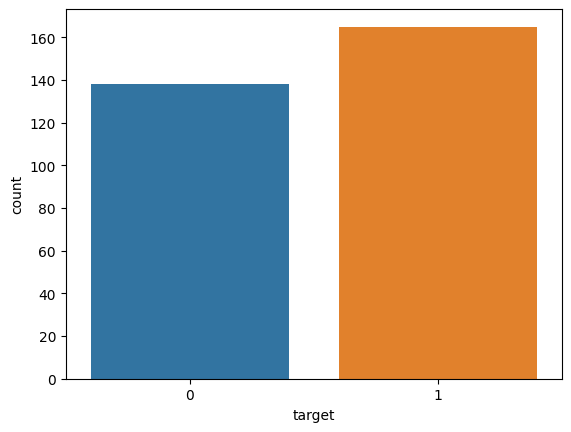

In [12]:
#help(sns.countplot)
sns.countplot(df, x='target')

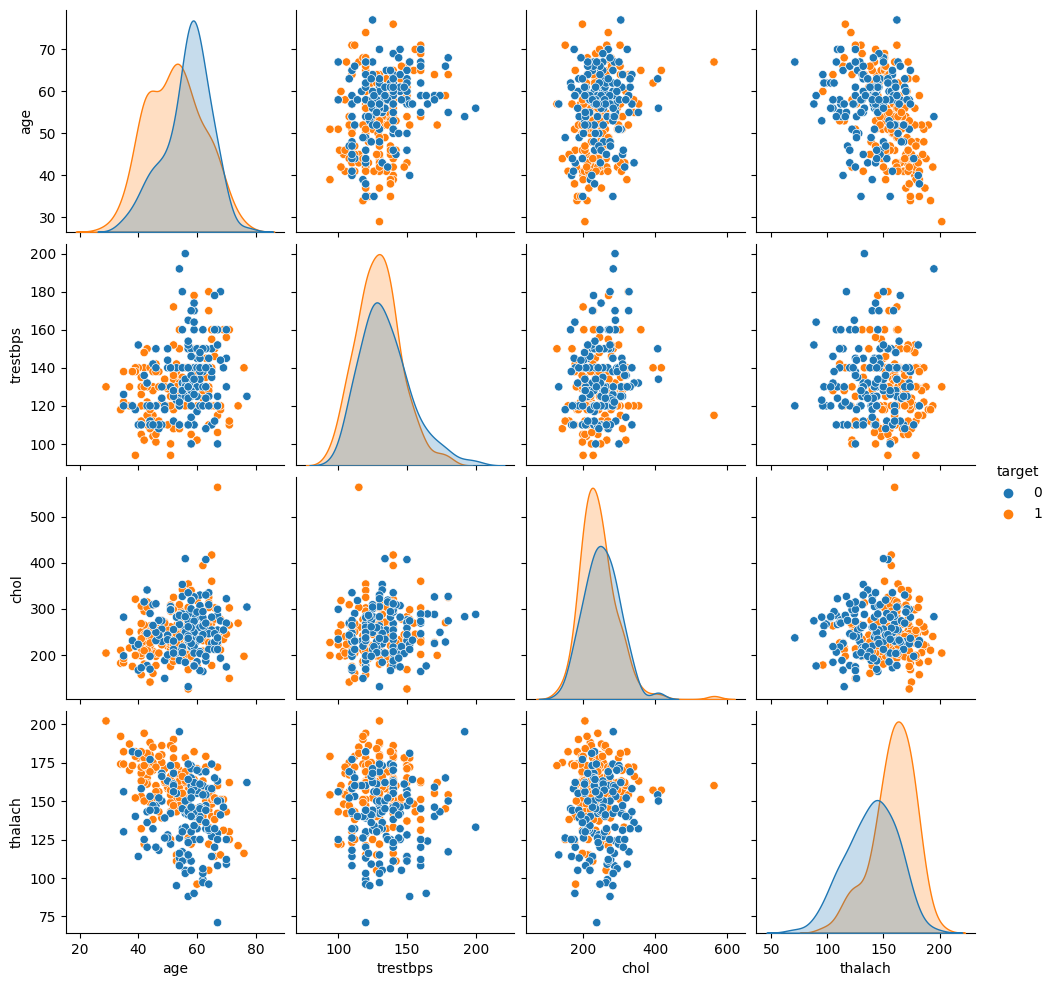

In [15]:
sns.pairplot(df, x_vars=['age','trestbps', 'chol','thalach'], y_vars=['age','trestbps', 'chol','thalach'], hue='target')

<Axes: >

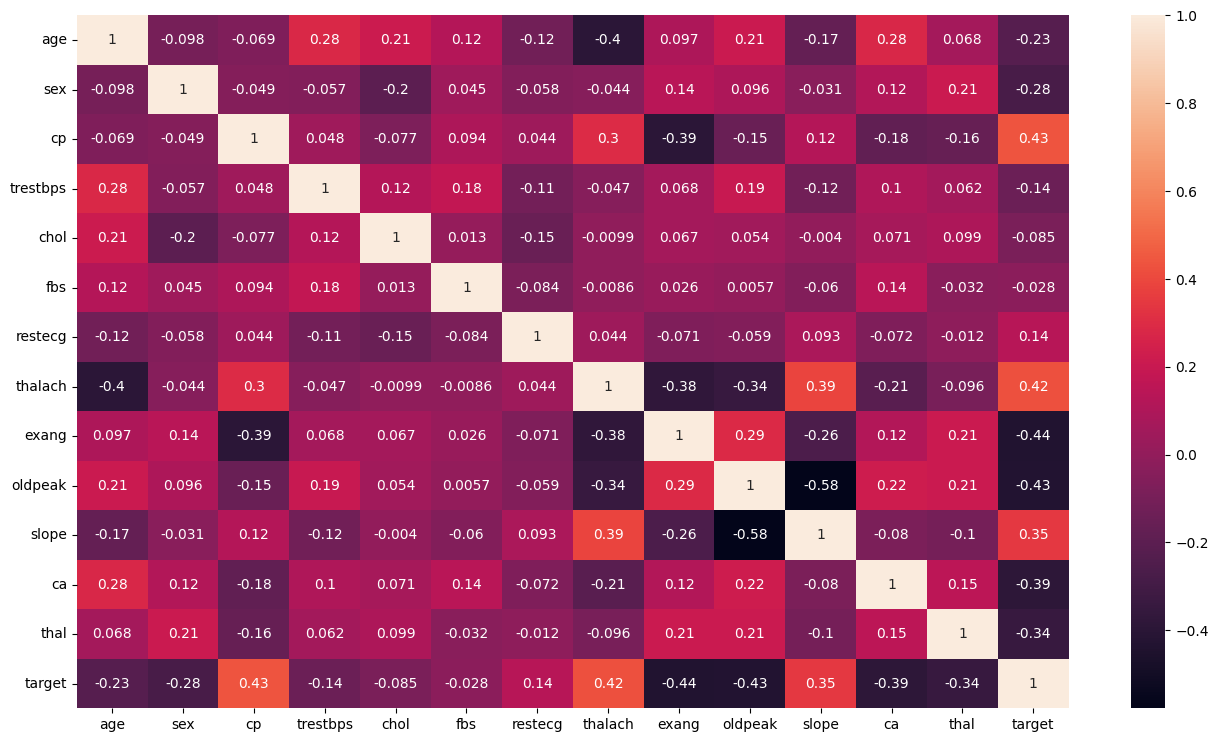

In [25]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True)

# Machine Learning
## Train | Test Split | Scaling and Logistic Regression Model

In [81]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
C = np.logspace(0,10, 10)
l1_ratios=[0, .1, .3, .5, .8, .9, .95, 1]
penalty=['l1', 'l2', 'elasticnet']

log_model = LogisticRegression(solver='saga',   max_iter=1000)

grid_model = GridSearchCV(log_model, param_grid={'C':C, 'l1_ratio':l1_ratios, 'penalty': penalty}, cv=10)
grid_model.fit(scaled_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'l1_ratio': [0, 0.1, 0.3, 0.5, 0.8, 0.9, 0.95, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [82]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0, 'penalty': 'l1'}

In [83]:
grid_model.best_estimator_

LogisticRegression(l1_ratio=0, max_iter=1000, penalty='l1', solver='saga')

### Coefficients

In [84]:
grid_model.best_estimator_.coef_

array([[-0.0478312 , -0.69653854,  0.88801438, -0.23906404, -0.18651673,
         0.0023681 ,  0.09601888,  0.42196696, -0.40863113, -0.52444671,
         0.35776477, -0.83237796, -0.56449746]])

In [85]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Model Performance Evaluation

In [86]:
y_pred = grid_model.predict(scaled_X_test)
accuracy_score(y_test, y_pred)

0.8387096774193549

In [87]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

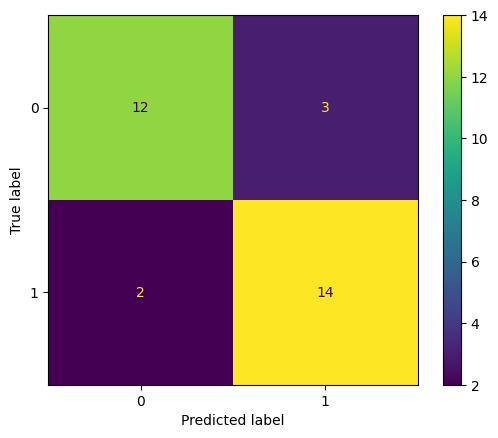

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

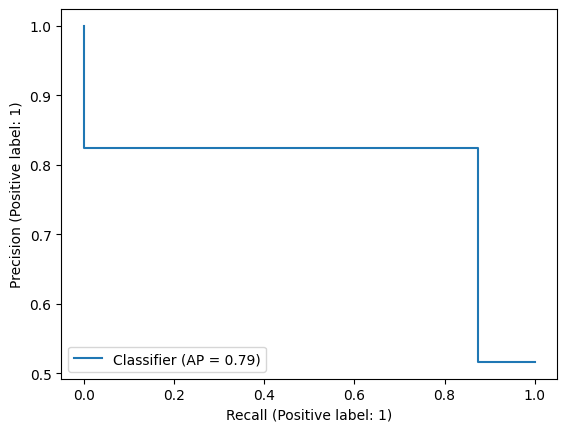

In [90]:
PrecisionRecallDisplay.from_predictions(y_pred=y_pred, y_true=y_test)

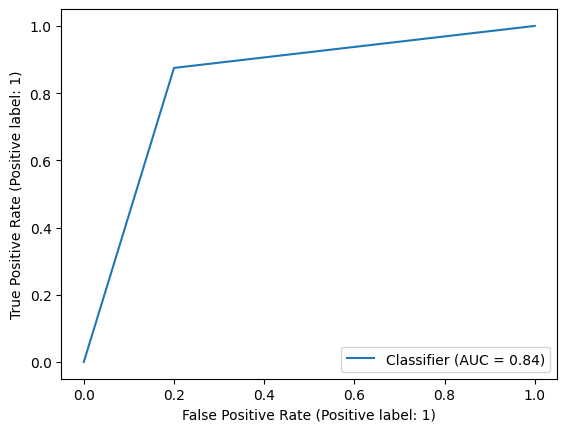

In [91]:
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred)

In [92]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]
grid_model.predict(patient)

array([0])

In [93]:
grid_model.predict_proba(patient)

array([[1.00000000e+00, 1.29487405e-18]])